# Introdução

    A analise a seguir tem como objetivo obter informações sobre a necessidade de auxílio por parte dos aposentados, em comparação com os não aposentados, para observar as diferenças entre os dois grupos; e, após esse processo, entender por que tal auxílio aos aposentados é necessário ou não, discutindo a atual eficiência do fundo de previdência quando se trata da cobertura total de gastos

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [25]:
print('Diretório:')
print(os.getcwd())

Diretório:
C:\Users\trcar\Desktop\Insper\2º Semestre\Ciência dos dados\Github\Projetos\CD\Projeto1


In [26]:
estrutura = pd.read_table("pes_py.txt", sep=";")

In [27]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [28]:
dados = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")
n = dados.shape[0]

In [29]:
dados.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [30]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [31]:
dados.columns = estrutura.Coluna

In [32]:
dados.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [106]:
# UF
dados.UF = dados.UF.astype('category')
dados.UF.cat.categories = ('RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF')

#dados.REGIAO = dados.UF


In [107]:
# Idade
dados.V8005 = dados.V8005.astype('float')


In [133]:
# Aposentados
dados.APOSENT = dados.V9122
dados.V9122 = dados.V9122.astype('category')
dados.V9122.cat.categories = ('Aposentado', 'Não_aposentado')

dados.APOSENT[(dados.V9122 == 'Aposentado')] = "Aposentado"
dados.APOSENT[(dados.V9122 == 'Não_posentado')] = "Não_aposentado"

## Tratamento de dados em relção ao auxílio recebido

### Variável Auxílio Moradia (V9043)

In [134]:
# Auxílio moradia
dados.V9043 = dados.V9043.astype('category')
dados.V9043.cat.categories = ('Sim', 'Não')

In [135]:
print('População que recebeu auxílio moradia:')
tcam=pd.crosstab(dados.V9043,dados.V9122,rownames=['Auxílio'], colnames=['Aposentado'])
tcam = tcam.fillna(0)
tcam

População que recebeu auxílio moradia:


Aposentado,Aposentado,Não_aposentado
Auxílio,,
Sim,162,4737
Não,2674,111722


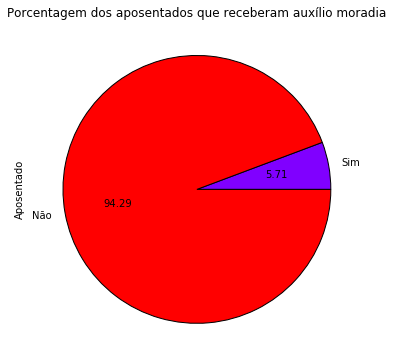

In [136]:
tcam.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio moradia', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

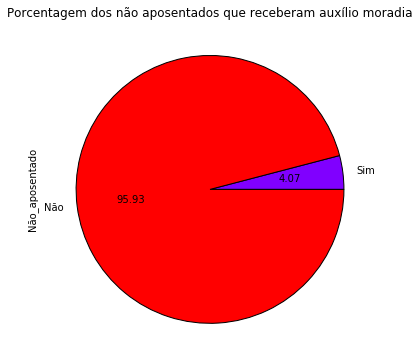

In [137]:
tcam.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio moradia', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

#### Conclusão
    
    A variável mostra que, comparando aposentados com não aposentados, a porcentagem do primeiro grupo que necessita de auxílio moradia é maior do que a do segundo grupo; revelando que, nesse quesito, os aposetados estão em uma condição pior do que os não aposentados.

### Variável Auxílio Alimentação (V9044)

In [113]:
dados.V9044 = dados.V9044.astype('category')
dados.V9044.cat.categories = ('Sim', 'Não')

In [114]:
print('População que recebeu auxílio alimentação:')
tcaa=pd.crosstab(dados.V9044,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcaa = tcaa.fillna(0)
tcaa

População que recebeu auxílio alimentação:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,1136,51912
Não,1700,64547


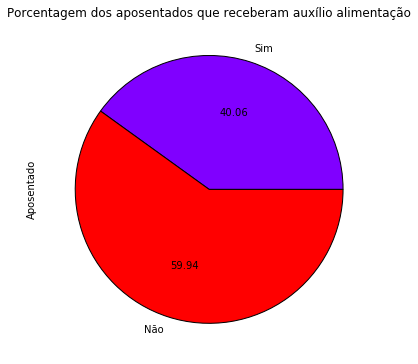

In [115]:
tcaa.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio alimentação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

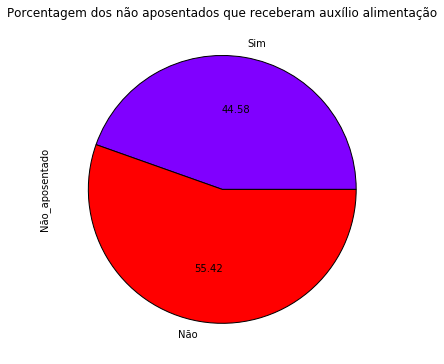

In [116]:
tcaa.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio alimentação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

#### Conclusão

    Ja de acordo com os resultados relevantes ao auxílio alimentação, é visível que os aposentados estão em uma situação melhor que os não aposentados; visto que este grupo possui uma maior porcentagem de beneficiados pelo auxílio do que o anterior.

### Variável Auxílio Transporte (V9045)

In [117]:
dados.V9045 = dados.V9045.astype('category')
dados.V9045.cat.categories = ('Sim', 'Não')

In [118]:
print('População que recebeu auxílio transporte:')
tcat=pd.crosstab(dados.V9045,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcat = tcat.fillna(0)
tcat

População que recebeu auxílio transporte:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,828,47880
Não,2008,68579


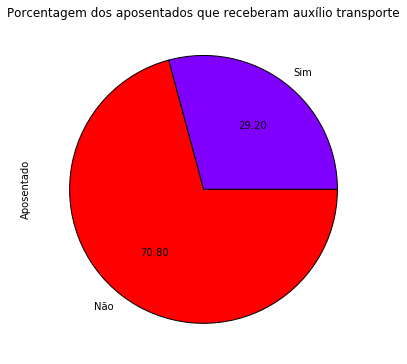

In [119]:
tcat.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio transporte', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

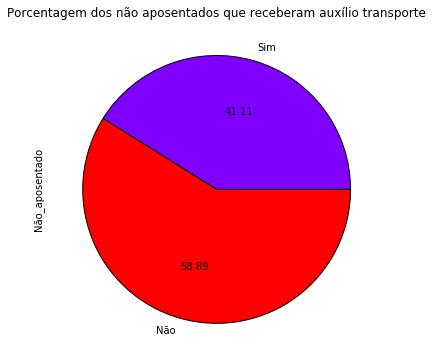

In [120]:
tcat.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio transporte', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

#### Conclusão

    A variável auxílio transporte revela que, os não aposentados possuem uma maior necessidade de auxílio transporte do que os aposentados; portanto, este grupo apresenta uma melhor situação do que aquele.

### Variável Auxílio Educação (V9046)

In [121]:
dados.V9046 = dados.V9046.astype('category')
dados.V9046.cat.categories = ('Sim', 'Não')

In [122]:
print('População que recebeu auxílio educação:')
tcae=pd.crosstab(dados.V9046,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcae = tcae.fillna(0)
tcae

População que recebeu auxílio educação:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,42,2928
Não,2794,113531


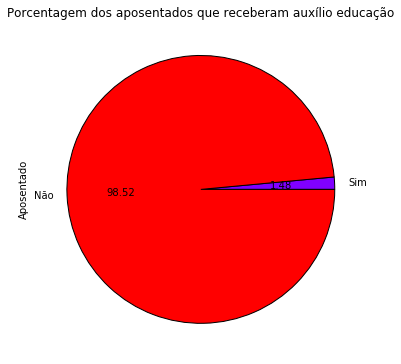

In [123]:
tcae.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio educação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

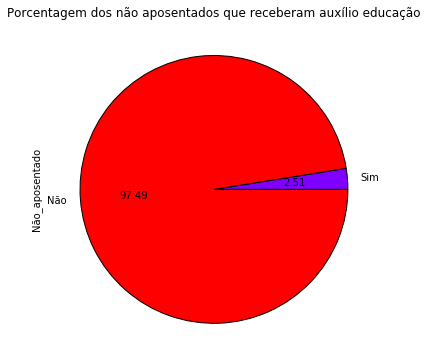

In [124]:
tcae.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio educação', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

#### Conclusão

    Na variável auxílio educaçaõ é visto que a porcentagem de não idosos que necessitam de auxílio educação é maior que a de não idosos; revelando que o primeiro grupo está pior que o segundo grupo nesse quesito.

### Variável Auxílio Saúde (V9047)

In [125]:
# Auxílio saúde
dados.V9047 = dados.V9047.astype('category')
dados.V9047.cat.categories = ('Sim', 'Não')

In [126]:
print('População que recebeu auxílio saúde:')
tcas=pd.crosstab(dados.V9047,dados.V9122,rownames=['Auxílio'], colnames=['Aposentados'])
tcas = tcas.fillna(0)
tcas

População que recebeu auxílio saúde:


Aposentados,Aposentado,Não_aposentado
Auxílio,,
Sim,591,21864
Não,2245,94595


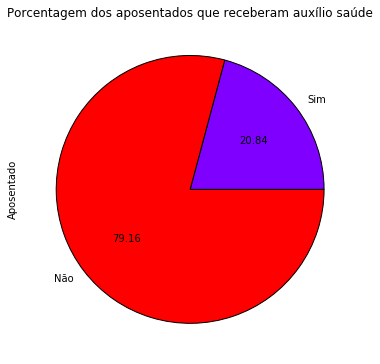

In [127]:
tcas.Aposentado.plot.pie(title= 'Porcentagem dos aposentados que receberam auxílio saúde', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

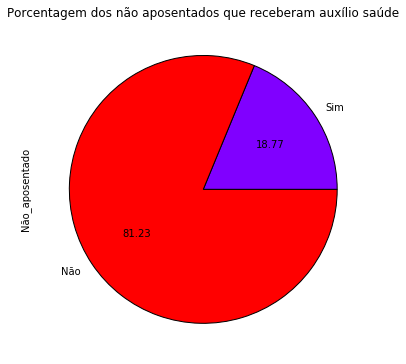

In [128]:
tcas.Não_aposentado.plot.pie(title= 'Porcentagem dos não aposentados que receberam auxílio saúde', figsize=(6,6), colormap="rainbow", autopct="%0.2f")

#### Conclusão

    Por fim, a variável auxílio saúde mostra que a porcentagem de aposentados que necessitam desse auxílio é muito maior do que a porcentagem dos não idosos; ou seja, nesse quesito os aposentados estão em uma situação mais precária que os não aposentados.

### Conclusão das variáveis relacionadas ao auxílio recebido

    Após a análise das cinco variáveis, obtem-se que em apenas duas os aposentados apresentaram uma condição pior que os não aposentados sendo essas auxílio moradia e auxílio saúde. 
    
    Mas independente desse resultado é visível uma falha dentro do sistema de previdência, pois uma renda atribuída a um cidadão aposentado teóricamente deveria ser suficiente para suprir todas as suas necessidades básicas; mas, ainda sim, todas as variáveis apresentaram uma parcela da população de aposentados que necessita de algum auxílio

### Análise variável renda per capita

In [129]:
dados.V4750 = dados.V4750.astype('float')

In [98]:
renda = dados.V4750
faixas_renda = range(0,20000, 1000)
classe = pd.cut(renda, faixas_renda)
classe.value_counts()

(0, 1000]         247915
(1000, 2000]       63458
(2000, 3000]       16032
(3000, 4000]        7264
(4000, 5000]        3818
(5000, 6000]        2237
(6000, 7000]        1463
(7000, 8000]         914
(8000, 9000]         669
(9000, 10000]        539
(10000, 11000]       287
(11000, 12000]       234
(12000, 13000]       225
(14000, 15000]       139
(13000, 14000]       134
(15000, 16000]        92
(16000, 17000]        67
(17000, 18000]        49
(18000, 19000]        39
Name: V4750, dtype: int64

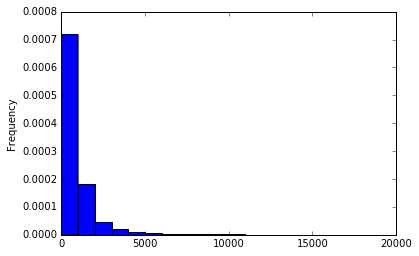

In [99]:
intervalo_renda = np.arange(0, 20000, 1000)
renda = renda.fillna(0)
histograma2 = renda.plot.hist(bins=intervalo_renda, normed=1)

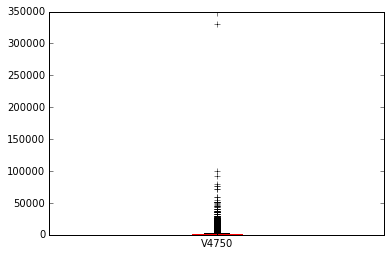

In [100]:
renda = renda[renda != 999999999999]
renda.plot.box()

In [101]:
renda.describe()

count    362627.000000
mean        981.311844
std        1639.967369
min           0.000000
25%         312.000000
50%         601.000000
75%        1075.000000
max      331200.000000
Name: V4750, dtype: float64

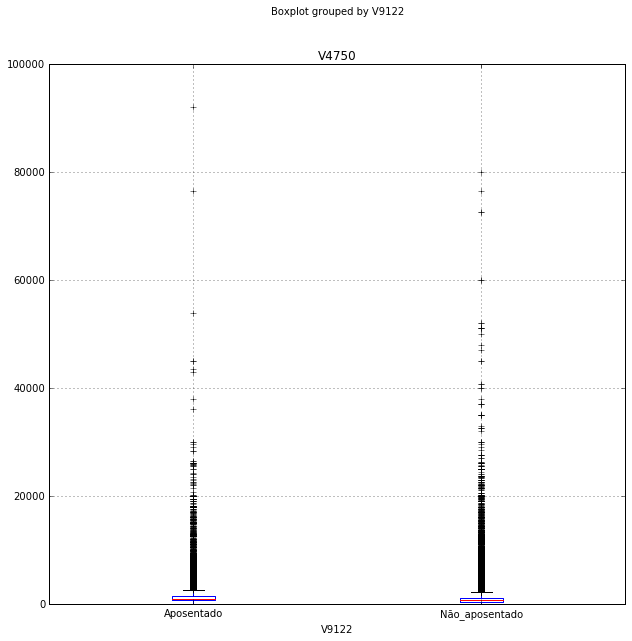

In [144]:
dados[dados.V4750 != 331200].boxplot(column= "V4750", by="V9122", figsize=(10,10))

In [165]:
rendaf = dados[(dados.V9122 == 'Aposentado') & (renda)]
#rendaaposentados = dados.V9122[(renda)]
rendaaposentados = rendaf.V4750
rendaaposentados

5          724.0
11         855.0
25        2362.0
26        2362.0
51         444.0
62         362.0
66        2862.0
77         924.0
82         144.0
87        1321.0
88        1321.0
98         762.0
103        724.0
138       1248.0
183        874.0
195        525.0
197        362.0
198        362.0
213        793.0
232        358.0
257       1162.0
267        384.0
280       1174.0
281       1174.0
372        724.0
373        724.0
374        910.0
375        910.0
382       1274.0
383       1274.0
           ...  
361838     794.0
361904     482.0
361909    1950.0
361974     905.0
361978    1448.0
361982     724.0
362016     812.0
362024     724.0
362059     724.0
362063    1931.0
362077     482.0
362080     362.0
362095     987.0
362105    1267.0
362108    1629.0
362120    1666.0
362165     749.0
362194    3000.0
362202    1448.0
362218     800.0
362239     180.0
362344    3291.0
362369    1086.0
362436    2833.0
362441     362.0
362450     362.0
362470    3306.0
362542    8000

In [166]:
rendaaposentados.describe()

count     36926.000000
mean       1531.480691
std        2733.554098
min          80.000000
25%         724.000000
50%         886.000000
75%        1500.000000
max      331200.000000
Name: V4750, dtype: float64

AttributeError: 'Series' object has no attribute 'boxplot'